# HR Analytics 

Hi Everyone, This is a fictional data set created by IBM data scientists. The dataset contains 35 features with the Target Attrition variable. So now our aim is to build a predictive model and predict whether an employee will resign or not.

Here is the link to the dataset: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Through our analysis, we intend to build a model that can predict whether an employee is about to leave. We will examine all the variables through a few graphs and deduce them in our exploratory analysis. After our exploration, we will build some features based on variables at hand and take an exclusion call of some variables in our case.

### Importing the Relevant Libraries

In [1]:
#importing libraries
import numpy as np  
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Data Inspection

In [2]:
#reading data
df= pd.read_csv('F://WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.shape

(1470, 35)

In [4]:
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


* __We have 1470 rows and 35 columns in Dataset.__

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* __We do not have any missing values in Dataset.__
* __There are 26 numerical  features and 9 categorical features present in the Dataset.__

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Data Cleaning

#### High or Low Feature Variability Check

In [7]:
#reviewing the unique count of values per feature
for col in df.columns:
    print(col, df[col].nunique(), len(df))

Age 43 1470
Attrition 2 1470
BusinessTravel 3 1470
DailyRate 886 1470
Department 3 1470
DistanceFromHome 29 1470
Education 5 1470
EducationField 6 1470
EmployeeCount 1 1470
EmployeeNumber 1470 1470
EnvironmentSatisfaction 4 1470
Gender 2 1470
HourlyRate 71 1470
JobInvolvement 4 1470
JobLevel 5 1470
JobRole 9 1470
JobSatisfaction 4 1470
MaritalStatus 3 1470
MonthlyIncome 1349 1470
MonthlyRate 1427 1470
NumCompaniesWorked 10 1470
Over18 1 1470
OverTime 2 1470
PercentSalaryHike 15 1470
PerformanceRating 2 1470
RelationshipSatisfaction 4 1470
StandardHours 1 1470
StockOptionLevel 4 1470
TotalWorkingYears 40 1470
TrainingTimesLastYear 7 1470
WorkLifeBalance 4 1470
YearsAtCompany 37 1470
YearsInCurrentRole 19 1470
YearsSinceLastPromotion 16 1470
YearsWithCurrManager 18 1470


In [8]:
df.drop(['EmployeeCount'], axis=1, inplace=True)
df.drop(['StandardHours'], axis=1, inplace=True)
df.drop(['Over18'], axis=1, inplace=True)
df.drop(['EmployeeNumber'], axis=1, inplace=True)

We can safely remove “EmployeeCount”, “StandardHours”, “Over18” since most if not all,only contains one unique value.  Also, we can remove “EmployeeNumber” as most values are unique for this feature.

### Exploratory Data Analysis

##### Gender Diversity

<AxesSubplot:xlabel='Gender', ylabel='count'>

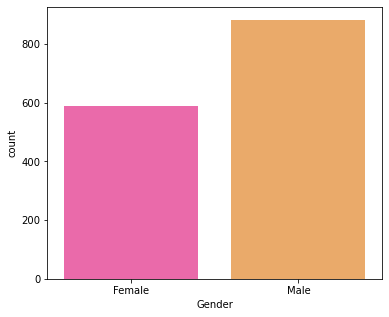

In [9]:
plt.figure(figsize=(6,5))
sns.countplot('Gender',data=df,palette='spring')

__The number of Female employees is less than Male employees.__

<AxesSubplot:xlabel='JobRole', ylabel='count'>

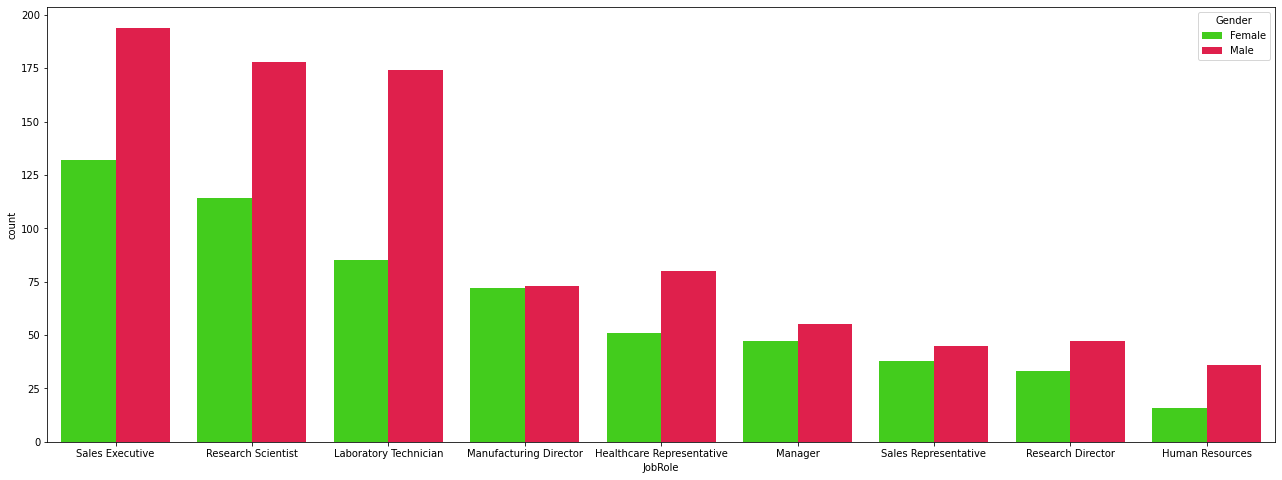

In [10]:
plt.figure(figsize=(22,8))
sns.countplot(x="JobRole", hue="Gender",data=df,palette='prism')

__Gender diversity is not maintained in any of the job roles.__

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

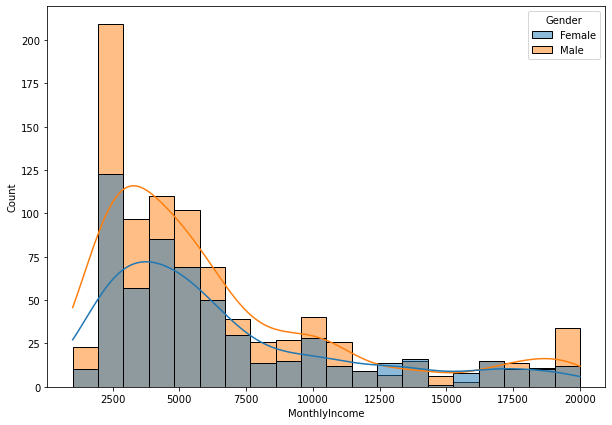

In [11]:
plt.figure(figsize=(10,7))
sns.histplot(x= 'MonthlyIncome',hue = 'Gender',data=df, kde = True)

__Distribution of Pay Between Men and Women for different job Role__

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

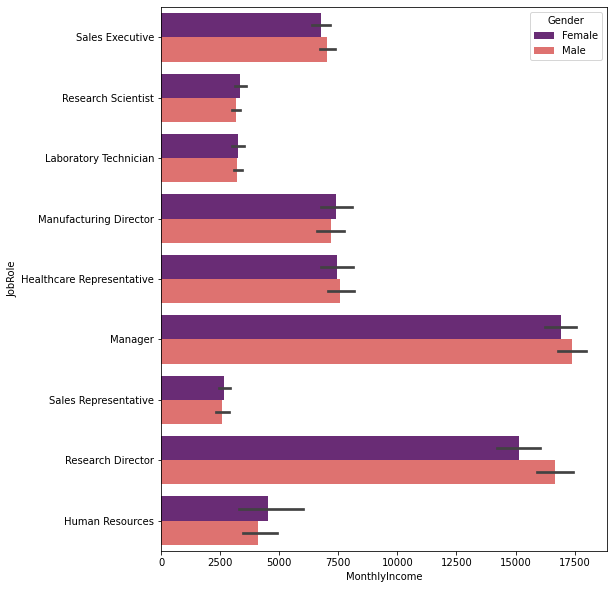

In [12]:
plt.figure(figsize=(8,10))
sns.barplot(y = 'JobRole',x = 'MonthlyIncome',hue = 'Gender',data = df,palette='magma')

<AxesSubplot:xlabel='Gender', ylabel='count'>

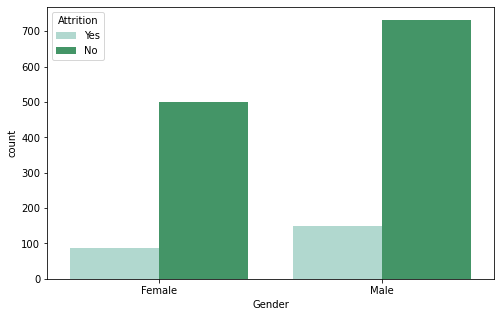

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x="Gender", hue="Attrition",data=df,palette='BuGn')

Text(0.5, 1.0, 'Monthly Income Vs Atrrition Histogram')

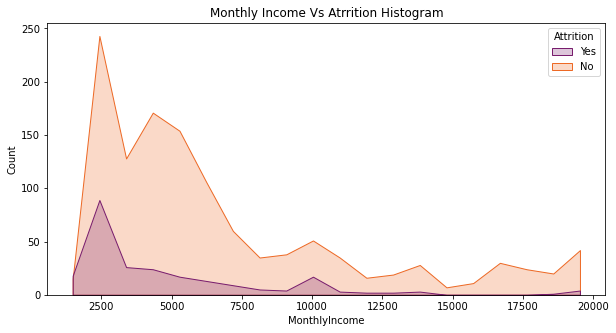

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(x='MonthlyIncome' ,hue='Attrition' , data=df ,element="poly", palette='inferno' );
plt.title("Monthly Income Vs Atrrition Histogram")

__People with less Monthly income tends to leave more.__

<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

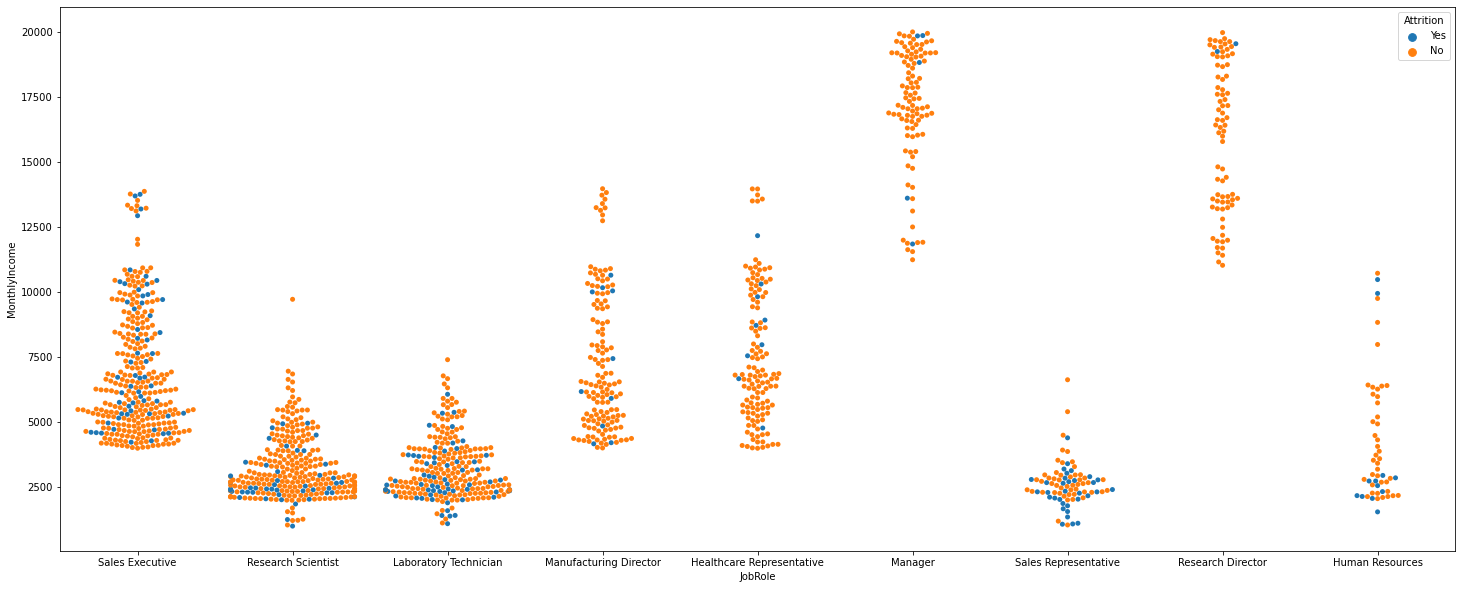

In [15]:
plt.figure(figsize=(25,10))
sns.swarmplot(x = 'JobRole',y='MonthlyIncome',hue = 'Attrition',data = df)

__Employees from "Sales Executive","Sales Representative","Laboratory Technician" and "Research Scientist" Roles have higher attrition.__

Text(0.5, 1.0, 'Attrition Rate by Working Years')

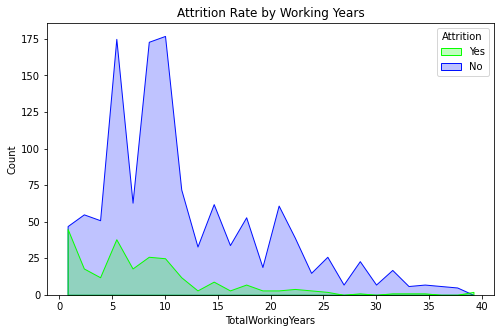

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(x='TotalWorkingYears' ,hue='Attrition' , data=df ,element="poly", palette='hsv' );
plt.title("Attrition Rate by Working Years")

Text(0.5, 1.0, 'Attrition Rate by Business Travel')

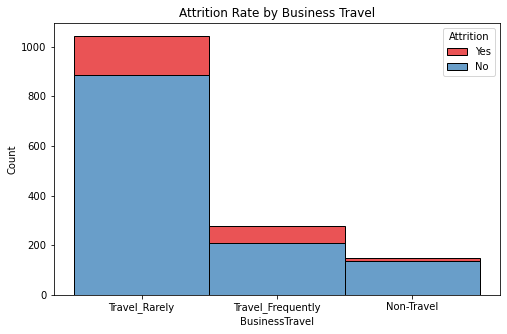

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(x='BusinessTravel',hue='Attrition',data=df, palette='Set1',multiple='stack')
plt.title("Attrition Rate by Business Travel")

Text(0.5, 1.0, 'Attrition Rate by Distance From Home')

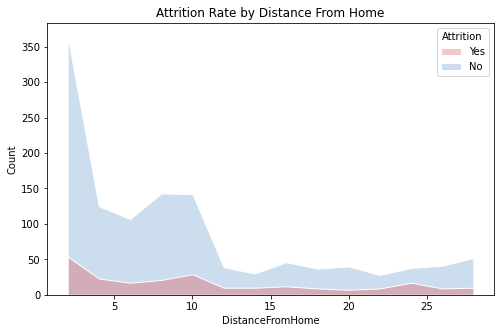

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(x='DistanceFromHome' ,hue='Attrition' , data=df ,palette='Set1', element='poly',edgecolor='white')
plt.title("Attrition Rate by Distance From Home")

Text(0.5, 1.0, 'Age Vs Atrrition Histogram')

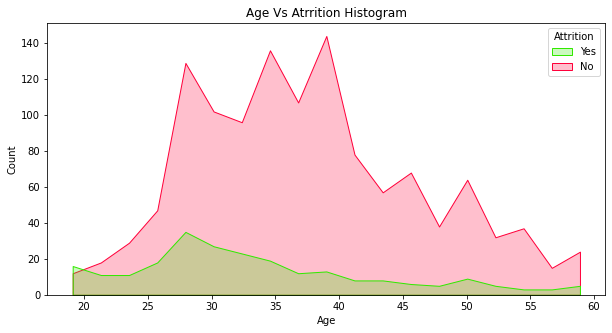

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(x='Age' ,hue='Attrition' , data=df ,element="poly", palette='prism' );
plt.title("Age Vs Atrrition Histogram")

__Employees in the age group of 25-35 years tends to change their job more.__

### Feature Engineering

__Let us Manually replace values of Categorical features with numbers, just to make calculations easy.__

In [20]:
df.Attrition.replace({'Yes': 1, 'No': 0}, inplace=True)

df['MaritalStatus'] = df['MaritalStatus'].replace({'Married' : 1,'Single' : 0,'Divorced' : 3,})

df['Gender'] = df['Gender'].replace({'Male' : 1,'Female' : 0})

df.BusinessTravel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace=True)

df.Department.replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}, inplace=True)

df.OverTime.replace({'No': 0, 'Yes': 1}, inplace=True)

df.EducationField.replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 
                           'Other': 5}, inplace=True)

df.JobRole.replace({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2,'Manufacturing Director': 3,
    'Healthcare Representative': 4,'Manager': 5,'Sales Representative': 6,'Research Director': 7,
    'Human Resources': 8}, inplace=True)

df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,1,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,0,2,1005,1,2,2,0,4,1,...,3,3,0,8,2,2,7,7,3,6
6,59,0,1,1324,1,3,3,1,3,0,...,4,1,3,12,3,2,1,0,0,0


In [21]:
corr = df.corr()

<AxesSubplot:>

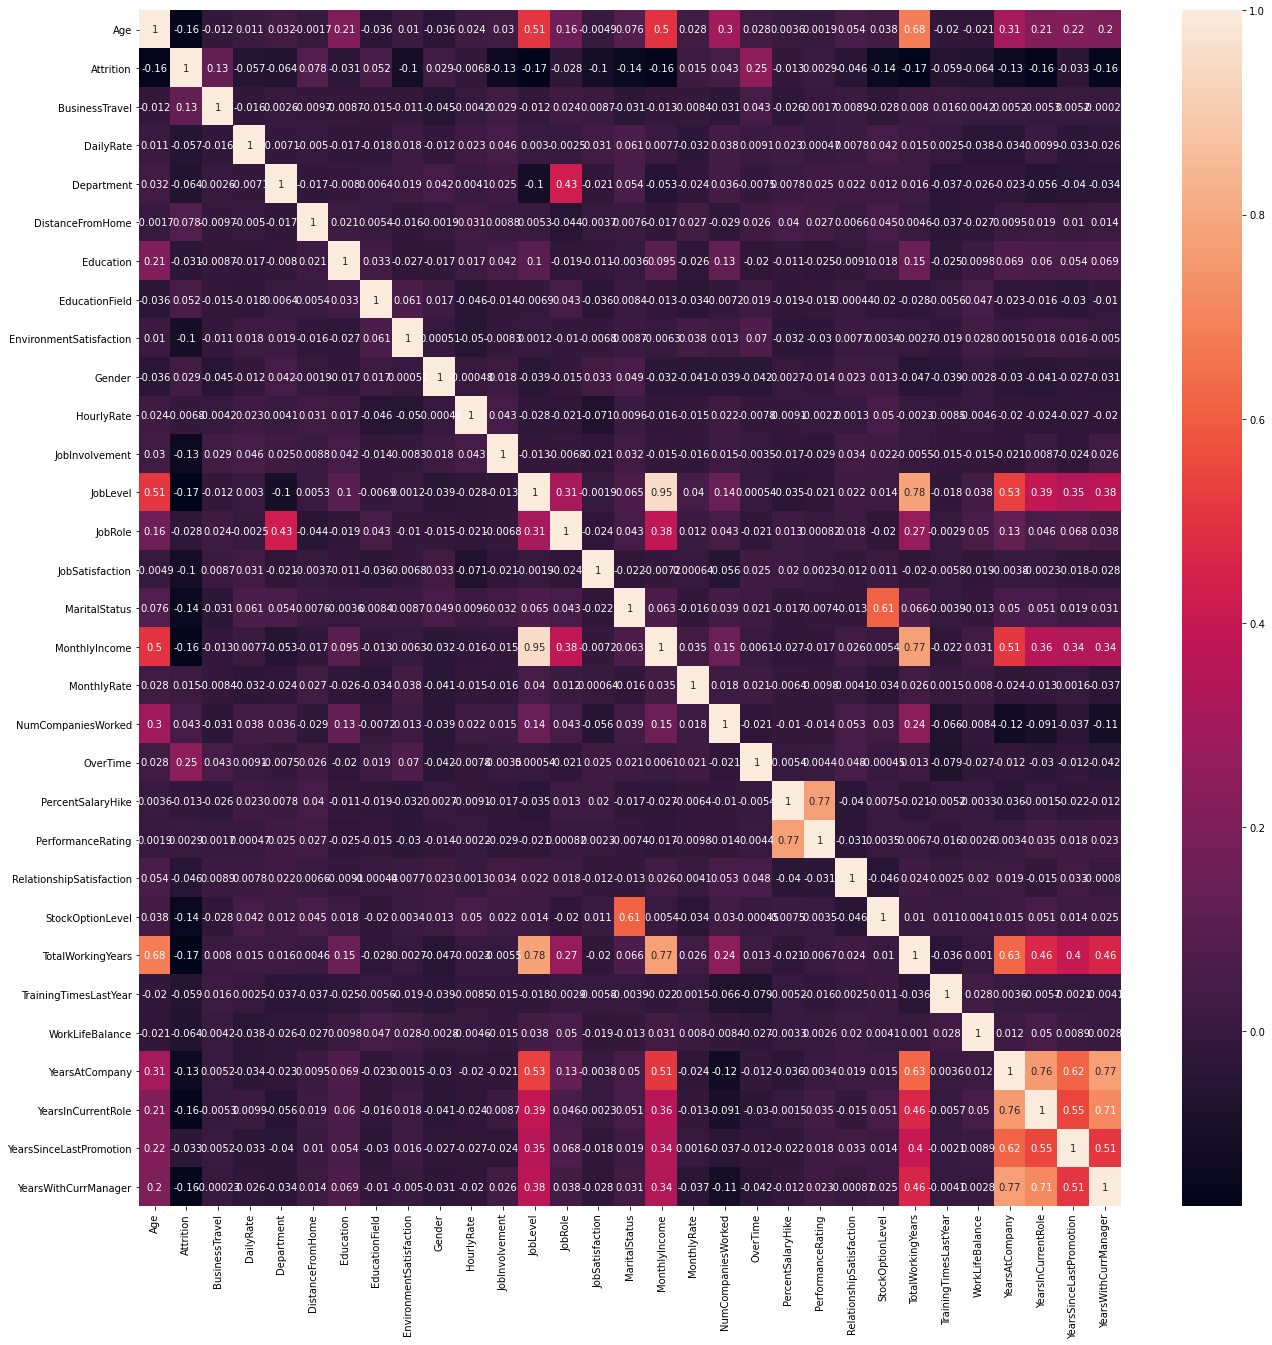

In [22]:
plt.figure(figsize=(22,22))
sns.heatmap(corr,annot=True)

* __Monthly income is strongly correlated with Job level.__
* __Job level is strongly correlated with total working years.__
* __Monthly income is strongly correlated with total working hours.__
* __Age is also positively correlated with the Total working hours.__

In [23]:
# Seperate Features and Target
X = df.drop(columns = ['Attrition'], axis=1)
y = df['Attrition']

In [24]:
# 20% data as validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

#### Model-Based Feature Selection

It judges the importance of each feature and keeps only the most important ones.

In [25]:
select = SelectFromModel(RandomForestClassifier(n_estimators = 100,random_state = 10))

In [26]:
select.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=10))

In [27]:
x_l1 = select.transform(X_train)

In [28]:
print(X_train.shape)
print(x_l1.shape)

(1176, 30)
(1176, 11)


In [29]:
x_test_l1 = select.transform(X_test)

In [30]:
print(X_test.shape)
print(x_test_l1.shape)

(294, 30)
(294, 11)


### Building Model

In [31]:
# Quick Comparison between a bunch of regressors

regressors = [DecisionTreeClassifier(),GradientBoostingClassifier(), RandomForestClassifier(), LogisticRegression()]


In [32]:
log_cols=["regressors", "scr"]
log = pd.DataFrame(columns=log_cols)

for rgr in regressors:
    rgr.fit(x_l1, y_train)
    name = rgr.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = rgr.predict(x_test_l1)
    scor_train = rgr.score(x_l1,y_train)
    scor_test = rgr.score(x_test_l1,y_test)
    
    print('Train set accuracy: %f'%rgr.score(x_l1,y_train))
    print('Test set accuracy: %f'%rgr.score(x_test_l1,y_test))
    
    
    log_entry = pd.DataFrame([[name, scor_test]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

DecisionTreeClassifier
****Results****
Train set accuracy: 1.000000
Test set accuracy: 0.738095
GradientBoostingClassifier
****Results****
Train set accuracy: 0.919218
Test set accuracy: 0.860544
RandomForestClassifier
****Results****
Train set accuracy: 1.000000
Test set accuracy: 0.853741
LogisticRegression
****Results****
Train set accuracy: 0.840136
Test set accuracy: 0.833333


Random Forest Classifier and Gradient Boosting Classifier both return the same accuracy on test data but Random Forest model is likely to be overfitting. That's why we will choose Gradient Boosting Classifier as the final model.

### Final Modeling

In [33]:
GBCModel = GradientBoostingClassifier(n_estimators=45,max_depth=4,random_state=10) 
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))


GBCModel Train Score is :  0.9583333333333334
GBCModel Test Score is :  0.891156462585034


__Gradient Boosting Classifier returns 89% accuracy on the test set and 95% accuracy on the training set.__

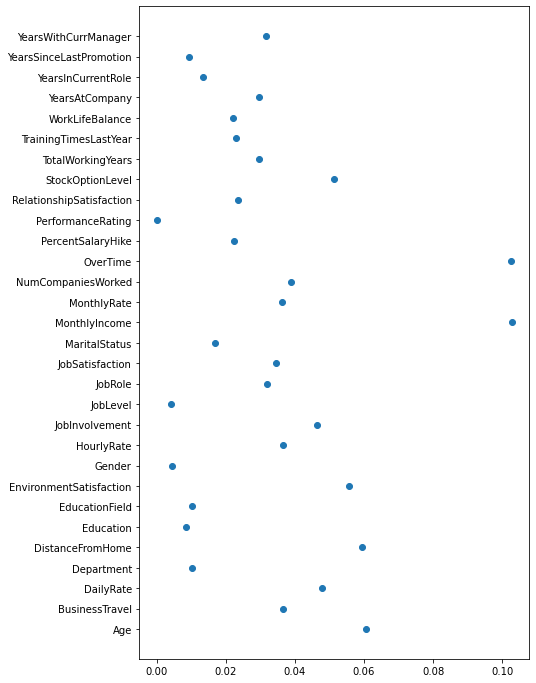

In [34]:
features = X.columns
plt.figure(figsize=(7,12))
plt.plot(GBCModel.feature_importances_,features,'o')

* __MonthlyIncome, OverTime, Age, DistanceFromHome and EnvironmentSatisfaction are the most important attributes to determine Attrition of employees.__